## The purpose of this drill is to determine which type of test to use: kruskal-wallace (comparing different groups with non normal data),  tukey's honest significant difference (finding the most different group), or one way anova (finding which group is most different from the total mean)

In [21]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'
df = pd.read_csv(data_url)

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [4]:
# year 6 is 2012 and year 7 is 2014
df['year'] = np.where(df.year == 6, 2012, 2014)
# partner 2 is no partner, partner 1 is has partner
df['partner'] = np.where(df.partner == 2, 0, 1)
# create new feature gender; 1 = male, 2 = female
df['gender'] = np.where(df.gndr == 2, 'F', 'M')
df = df.drop('gndr',1)

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,agea,partner,gender
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,60.0,1,F
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,59.0,1,F
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,24.0,0,M
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,64.0,1,F
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,55.0,1,F


In [5]:
df = pd.concat([df, pd.get_dummies(df.year)], 1)

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,agea,partner,gender,2012,2014
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,60.0,1,F,1,0
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,59.0,1,F,1,0
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,24.0,0,M,1,0
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,64.0,1,F,1,0
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,55.0,1,F,1,0


In [55]:
df.cntry.value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [6]:
for country in df.cntry.unique():
    trst2012 = df[(df['year'] == 2012) & (df['cntry'] == country)].ppltrst.mean()
    trst2014 = df[(df['year'] == 2014) & (df['cntry'] == country)].ppltrst.mean()
    print('People in',country,'are LESS trusting in 2014') if trst2012 > trst2014 else print('People in',country,'are MORE trusting in 2014')

People in CH are MORE trusting in 2014
People in CZ are MORE trusting in 2014
People in DE are MORE trusting in 2014
People in ES are LESS trusting in 2014
People in NO are LESS trusting in 2014
People in SE are MORE trusting in 2014


In [54]:
# applying kruskal test; comparing two or more groups
trst = pd.DataFrame()
trst['2012'] = df[(df['year'] == 2012) & (df['cntry'] == 'CH')].ppltrst.tolist()
trst['2014'] = df[(df['year'] == 2014) & (df['cntry'] == 'CH')].ppltrst.tolist()

ranks = stats.rankdata(trst['2012'].tolist() + trst['2014'].tolist())
trst['rank_2012'] = ranks[0:773]
trst['rank_2014'] = ranks[773:1546]

print(trst[['rank_2012', 'rank_2014']].apply(np.mean))

print(np.mean(ranks))

stats.kruskal(trst['2012'], trst['2014'])

773
rank_2012    767.342173
rank_2014    779.657827
dtype: float64
773.5


KruskalResult(statistic=0.3016359964448019, pvalue=0.5828586111442048)

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [7]:
for country in df.cntry.unique():
    happy2012 = df[(df['year'] == 2012) & (df['cntry'] == country)].happy.mean()
    happy2014 = df[(df['year'] == 2014) & (df['cntry'] == country)].happy.mean()
    print('People in',country,'are not as happy in 2014') if happy2012 > happy2014 else print('People in',country,'are happier in 2014')

People in CH are happier in 2014
People in CZ are happier in 2014
People in DE are happier in 2014
People in ES are not as happy in 2014
People in NO are not as happy in 2014
People in SE are happier in 2014


## 3. Who reported watching more TV in 2012, men or women?

In [8]:
maletv = df[(df['year'] == 2012) & (df['gender'] == 'M')].tvtot.mean()
femaletv = df[(df['year'] == 2012) & (df['gender'] == 'F')].tvtot.mean()
print('Males watched more tv in 2012') if maletv > femaletv else print('Females watched more tv in 2012')

Females watched more tv in 2012


## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [9]:
alone = df[(df['year'] == 2012) & (df['partner'] == 0)].pplfair.mean()
not_alone = df[(df['year'] == 2012) & (df['partner'] == 1)].pplfair.mean()
print('Alone') if alone > not_alone else print('People living with a partner')

People living with a partner


## 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [59]:
# tukey's honest significant difference and anova one way are useful for these situations to find out which group stands out.
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [70]:
for i, country in enumerate(df.cntry.unique()):
    print(country, len(df[(df['cntry'] == country) & (df['year']==2014)]))

CH 773
CZ 658
DE 14
ES 1213
NO 731
SE 908


In [71]:
cntry_list = 'CH', 'CZ', 'ES', 'NO', 'SE'
max_len = 600

In [77]:
sclmeet2014 = pd.DataFrame()

sclmeet2014['ch'] = df[(df['year'] == 2014) & (df['cntry'] == 'CZ')].sclmeet.head(600).tolist()
sclmeet2014['cz'] = df[(df['year'] == 2014) & (df['cntry'] == 'CZ')].sclmeet.head(600).tolist()
sclmeet2014['es'] = df[(df['year'] == 2014) & (df['cntry'] == 'ES')].sclmeet.head(600).tolist()
sclmeet2014['no'] = df[(df['year'] == 2014) & (df['cntry'] == 'NO')].sclmeet.head(600).tolist()
sclmeet2014['se'] = df[(df['year'] == 2014) & (df['cntry'] == 'SE')].sclmeet.head(600).tolist()

social = np.asarray(sclmeet2014['ch'].tolist() + sclmeet2014['cz'].tolist()
                   + sclmeet2014['es'].tolist() + sclmeet2014['no'].tolist()
                   + sclmeet2014['se'].tolist())

label = np.array(['ch', 'cz', 'es', 'no', 'se'])
label = np.repeat(label, 600)

tukey = pairwise_tukeyhsd(endog = social,  #data
                         groups = label,   #groups
                         alpha = 0.05)    #significance level
tukey.summary()

c:\users\brian\appdata\local\programs\python\python36\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1281: RuntimeWarning: invalid value encountered in greater
  reject = st_range > q_crit
c:\users\brian\appdata\local\programs\python\python36\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1283: RuntimeWarning: invalid value encountered in greater
  reject2 = np.abs(meandiffs) > crit_int


group1,group2,meandiff,lower,upper,reject
ch,cz,nan,nan,nan,False
ch,es,nan,nan,nan,False
ch,no,nan,nan,nan,False
ch,se,nan,nan,nan,False
cz,es,nan,nan,nan,False
cz,no,nan,nan,nan,False
cz,se,nan,nan,nan,False
es,no,nan,nan,nan,False
es,se,nan,nan,nan,False
no,se,-0.1333,nan,nan,False


In [78]:
# not very significant, trying anova one way

In [79]:
sclmeet2014.mean()

ch    4.427136
cz    4.427136
es    5.364548
no    5.335000
se    5.201667
dtype: float64

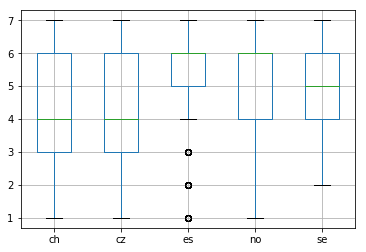

In [80]:
sclmeet2014.boxplot()
plt.show()

In [83]:
F, p = stats.f_oneway(sclmeet2014['ch'],
                     sclmeet2014['cz'],
                     sclmeet2014['es'],
                     sclmeet2014['no'],
                     sclmeet2014['se'])
# f statistic
print(F)

# probability
print(p)

nan
nan


## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [13]:
sclact2014 = pd.DataFrame()
nation = []
for i, country in enumerate(cntry_list):
    nation.append(df[(df['year'] == 2014) & (df['cntry'] == country)].sclact.head(max_len).tolist())
    sclact2014[country] = nation[i]
    
print(sclact2014.mean())
F, p = stats.f_oneway(sclact2014['CH'],
                     sclact2014['CZ'],
                     sclact2014['ES'],
                     sclact2014['NO'],
                     sclact2014['SE'])
print(F)
print(p)


CH    2.777266
CZ    2.703077
ES    2.609302
NO    2.881459
SE    2.865649
dtype: float64
nan
nan
